# FDA Course Homework
## 1. Top-10 Reviewer

In [1]:
import numpy as np
import scipy
import pandas as pd

In [2]:
data_path = "./amazon-fine-food-reviews/Reviews.csv"
pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]
pd_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
count = pd_data.groupby(['UserId','ProfileName']).size()
mean  = pd_data.groupby(['UserId','ProfileName'])['Score'].mean()

result = pd.concat([count, mean], axis=1).sort_values(by=['Score'], ascending=False).sort_values(by=['Score'])
result = result.sort_values(by=0, ascending=False)
result = result.rename({0:'Score count', 'Score': 'Score mean'}, axis='columns')
print(result.head())


                                                           Score count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3PJZ8TU8FDQ1K Jared Castle                                          7   

                                                           Score mean  
UserId         ProfileName                                             
A1Z54EM24Y40LL c2                                            3.882353  
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"    3.800000  
A35R32TA60XD57 M. Torma                                      4.111111  
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"        5.000000  
A3PJZ8TU8FDQ1K Jared Castle                      

## 2. Plot score distribution for the user with the most number of reviews

In [4]:
top = result.head(5)['Score count']
top.plot.bar()

## 3. Plot pandas Series DataFrame (Time->Date)
* axis-X : Date of reviews (transfer column "Time" -> Date)
* axis-Y : Numbers of reviews in the date interval
* Type : bar graph

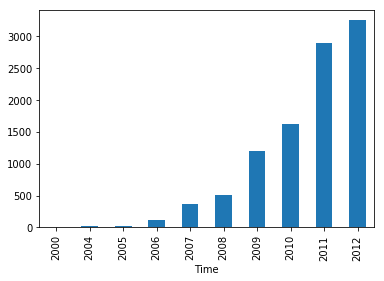

In [11]:
tDomain = pd_data.copy()
tDomain['Time'] = pd.to_datetime(tDomain['Time'], unit='s')
tDomain['Time'] = tDomain.Time.dt.year
tDomain = tDomain.groupby(by=['Time'])['Id'].count()
tDomain.plot(kind='bar')

## 4. Plot HeatMap using seaborn
* Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)

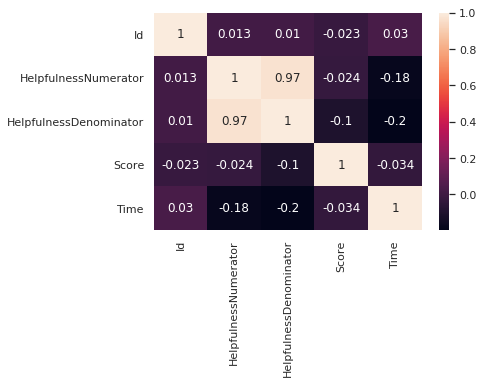

In [10]:
import seaborn as sb
HeatMap = sb.heatmap(pd_data.corr(), annot=True)

## 5. Helpful percent
* If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.

* If viewers of that comment just make a comment, then it adds to Helpfulness denominator.

* Note : you should filter out some cases with numerator > denominator

* Plot the distribution of helpful percent (hint: .hist())

* Ratio = -1, if both Helpfulness numerator & Helpfulness denominator are zero.

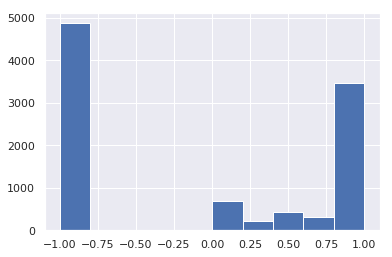

In [19]:
help_per = (pd_data['HelpfulnessNumerator'] / pd_data['HelpfulnessDenominator']).fillna(-1)
help_per.hist()